In [2]:
# The qiskit modules to import
from qiskit import assemble, Aer, QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector

# Other modules to import
from math import sqrt, pi
import numpy as np

# Introduction to qubits with QISKit

This notebook introduces qubits and quantum circits in QISKit. After working through this notebook a user will have knowledge about qubits and know how to create a QISKit quantum circuit. These are the building blocks for creating more complicated quantum computing algorithms and applications. 


## Qubits
Recall that the basic unit of information on a quantum computer is the qubit. It is the quantum mechanics extension of the bit. Qubits store a binary piece of information and give an output of 0 or 1 and are the building blocks of your quantum circuit. Below we recall the qubit notation that was introduced in the slides.


### Qubit notation
We use braket notation to represent qubits. A single qubit is represented as a column vector with 2 entries. The $0$- and $1$-states are denoted, respectively, as
$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\ket{0} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, 
\ket{1} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}. 
$$

Let's create our first quantum circuit with a single qubit.

## First quantum circuit

In the following code block we will instantiate a QuantumCircuit object with a single qubit. We will instruct the circuit to measure the qubit and then draw the circuit.

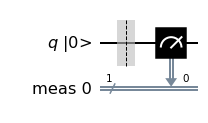

In [11]:
# Instantiate a QuantumCircuit object with 1 qubit
qc = QuantumCircuit(1)
# Take measurements at the end of the quantum circuit for all of the qubits
qc.measure_all()
# Draw the circuit using the mpl format and display the initial state which by default is |0>
qc.draw(initial_state=True, output='mpl') # we should set up the notebook so as not to passs in the output

The parts of the circuit are the qubit register. In this case, we have a singled qubit $q$ that is initialized in the zero state $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{0}$ .The vertical gray block with a dashed lined is a barrier. The barrier  is used to indicate the end of the quantum circuit before the measurement. No operations take place at a barrier, it is only for visualization purposes. The black measurement icon indicates when a measurement takes place. Measurement destroys a quantum state. The double line at the bottom of the circuit drawing is the register where the values from the measured qubits are recorded.

Now let's see what happens when we simulate this circuit and make multiple measurements of the circuit.

In the below code block we create a simulation object. This simulation object will simulate the quantum circuit that we have created. The simulation object runs makes multiple measurements of the circuit. The output of all the measurements is then displayed in a histogram.

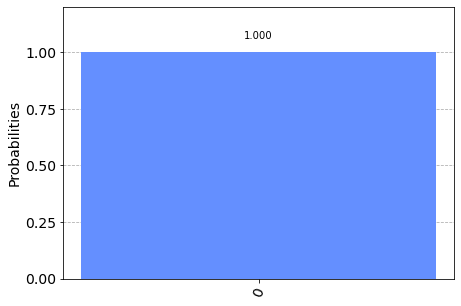

In [12]:
# Instantiate the simulation object using the 'aer_simulator', there are other backend simulators that can be used
sim = Aer.get_backend('aer_simulator')
# Run the quantum circuit and store in a  result object
result = sim.run(qc).result()
# Get the measurement counts from the result object
counts = result.get_counts()
# Plot in a histogram the counts 
plot_histogram(counts)

In this case, there is 100% probability we measure the qubit as a zero. It is important to think about what this means.

Let's see how this probability will change by initializing the qubit with a different state. This will further emphasize what superposition and measurement really mean.


### Superposition and measurement
Recall that the most generic representation of a qubit is
$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\ket{q} = 
\begin{bmatrix} \alpha \\ \beta \end{bmatrix}
= 
\alpha\ket{0} + \beta\ket{1}
$$
with complex number coefficients $\alpha = a+bi, \beta=c+di$.

The complex coefficients must satisfy the condition:
$$
\vert \alpha \vert^{2} + \vert \beta \vert^{2} = 1.
$$

In this general state, we can see that the qubit $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{q}$ is in a superposition. Note that in the previous example, $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{q}$ was only in the zero-state.

The qubit $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{q}$ is measured as a $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{0}$ with probability $\vert \alpha \vert^{2}$ and as a $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{1}$ with probability $\vert \beta \vert^{2}$.

Now let's consider a qubit with the following form:

$$
\ket{q_0} = 
\frac{1}{\sqrt{2}}\ket{0} + \frac{i}{\sqrt{2}}\ket{1} =
\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{i}{\sqrt{2}} \end{bmatrix}.
$$

The vector $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{q_0}$ is called a state vector and tells us everything we need to know about the qubit. 



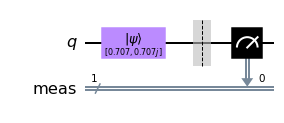

In [13]:
qc = QuantumCircuit(1)
# Define the initial state, j represents the imaginary number i in qiskit
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.draw(output='mpl')

What do you think will happen when we measure this circuit?

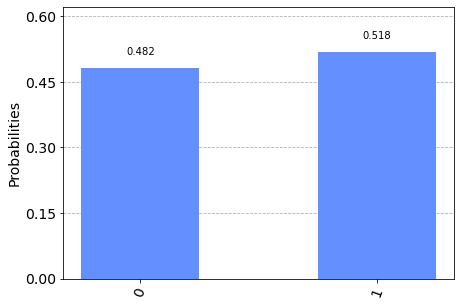

In [14]:
# Run this block multiple times and see what happens. Think about what this means.
sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
counts = result.get_counts()
plot_histogram(counts)

We now observe a roughly equal probability of measuring the qubit in the 0- or the 1-states.

Some things to ponder and try out for yourself:
- Can you create an initial state with a 3/4 probability of measuring $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{0}$?
- Does adding the complex number $i$ in the coefficient change the probability?
- Can you change the default number of measurements taken in a simulated run?

## The Bloch Sphere

Now that we have created our first quantum circuit with a single qubit is and seen examples of superposition and measurement, let's visualize our qubits with the Bloch sphere. Recall that with a bit of mathematics, we can always express a qubit in the following form:

$$
\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\ket{q} = \cos\frac{\theta}{2} \ket{0} + e^{i\phi}\sin\frac{\theta}{2}\ket{1}
$$

We can interpret $\theta, \phi$ as polar coordinates (with a radius $r=1$). This means that we can visually represent any qubit as a point on a sphere. For example, let's consider the following coordinates $\theta = \pi/2, \phi=0$. The term $e^{i\phi}$ is referred to as the phase. 

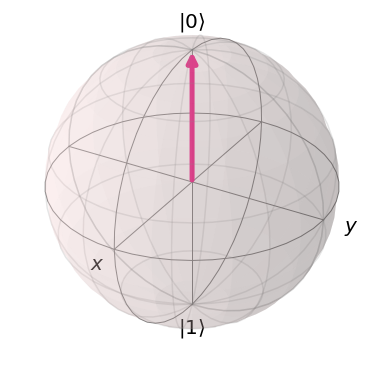

In [15]:
coords = [1, 0, 0] # [Radius, Theta, Phi]
plot_bloch_vector(coords, coord_type='spherical') 

We can also pass in Cartesian $(x, y, z)$ coordinates as follows.

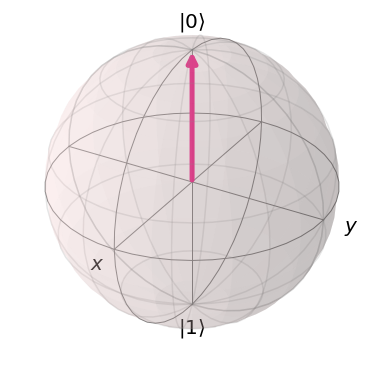

In [16]:
coords = [0, 0, 1] # [x, y, z]
plot_bloch_vector(coords, coord_type='cartesian') 

Try plotting the following qubits:
1. $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\ket{1}$
1. $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$
1. $\newcommand{\ket}[1]{\left|{#1}\right\rangle}\frac{1}{\sqrt{2}}(\ket{0} + i\ket{1})$

Some hints are below:
1. $\frac{1}{\sqrt{2}} = \frac{\sqrt{2}}{2}$
1. $\sin\frac{\pi}{4} = \cos\frac{\pi}{4} =  \frac{\sqrt{2}}{2}$
1. $e^{i\pi} = -1$
1. $e^{i\pi/2} = i$

For an interactive experience with the Bloch sphere click on this [link](https://javafxpert.github.io/grok-bloch/).